In [1]:

import pandas as pd
import io

  
df=pd.read_csv("../input/flight-take-off-data-jfk-airport/M1_final.csv")
print(df)

       MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0         11             1            5                B6   N828JB  CHS   
1         11             1            5                B6   N992JB  LAX   
2         11             1            5                B6   N959JB  FLL   
3         11             1            5                B6   N999JQ  MCO   
4         11             1            5                DL   N880DN  ATL   
...      ...           ...          ...               ...      ...  ...   
28815      1            31            5                B6   N216JB  ORH   
28816      1            31            5                AA   N104NN  BOS   
28817      1            31            5                AS   N581AS  SEA   
28818      1            31            5                B6   N957JB  SJU   
28819      1            31            5                B6   N958JB  BQN   

       DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  \
0             -1        

In [2]:
#for i in range(df.shape[0]):
 # if()
#print( type(df[0]))
df1=df.copy(deep=True)
for i in range(df.shape[0]):
  s=str(df.iloc[[i],13])
  for x in s :
      if x =='\xa0':
        df1.drop(i,axis=0,inplace=True)
        break
for i in range(df.shape[0]):
  s=int(df.iloc[[i],13])
  
data=df1.values
X,Y=data[:,:-1],data[:,-1]
print(X.shape,Y.shape)
from sklearn.model_selection import train_test_split

(27095, 22) (27095,)


In [3]:
from sklearn import preprocessing as pre
#import numpy as np

label=pre.LabelEncoder()
X[:,3]=label.fit_transform(X[:,3].astype(str))
X[:,4]=label.fit_transform(X[:,4].astype(str))
X[:,5]=label.fit_transform(X[:,5].astype(str))
X[:,15]=label.fit_transform(X[:,15].astype(str))
X[:,19]=label.fit_transform(X[:,19].astype(str))
X[:,13]=label.fit_transform(X[:,13].astype(str))

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(24385, 22) (2710, 22) (24385,) (2710,)


In [5]:
import numpy as np
msel=np.empty(8,dtype=float)


## 1. Linear Regression with Label Encoding


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lreg=LinearRegression()
lreg.fit(X_train,Y_train)
pred=lreg.predict(X_test)
msel[0]=mean_squared_error(Y_test,pred)**0.5
print(msel[0])

6.481647798635636


## 2. Ridge Regression  with Label Encoding

In [7]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.05, normalize=True)
ridgereg.fit(X_train,Y_train)
pred1=ridgereg.predict(X_test)
msel[1]=mean_squared_error(Y_test,pred1)**0.5
print(msel[1])

6.4935047923289115


## 3. Lasso Regression with Label Encoding

In [8]:
from sklearn.linear_model import Lasso
lasreg=Lasso(alpha=0.05, normalize=True)
lasreg.fit(X_train,Y_train)
pred2=lasreg.predict(X_test)
msel[2]=mean_squared_error(Y_test,pred2)**0.5
print(msel[2])

6.830074618379034


## 4. KNN Regression with Label Encoding

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=200)
knnr.fit(X_train,Y_train)
pred3=knnr.predict(X_test)
msel[3]=mean_squared_error(Y_test,pred3)**0.5
print(msel[3])

6.657470624095994


## 5. Support Vector Regression with Label Encoding

In [10]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
x1=X_train.copy()
x2=X_test.copy()
x1=sc1.fit_transform(x1)
x2=sc2.fit_transform(x2)
svr=SVR()
svr.fit(x1,Y_train)
pred4=svr.predict(x2)
msel[4]=mean_squared_error(Y_test,pred4)**0.5
print(msel[4])

6.290559699754802


## 6. Random Forest with Label Encoding 




In [11]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor()
rand.fit(X_train,Y_train)
pred5=rand.predict(X_test)
msel[5]=mean_squared_error(Y_test,pred5)**0.5
print(msel[5])

5.6733293198928365


## 7. Light GBM model with Label Encoding


In [12]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train,Y_train)
pred6=lgbm.predict(X_test)
msel[6]=mean_squared_error(Y_test,pred6)**0.5
print(msel[6])

5.792786411785913


## 8. Naive Bayes (Bayesian Ridge) with Label Encoding

In [13]:
from sklearn.linear_model import BayesianRidge
bayreg=BayesianRidge()
bayreg.fit(X_train,Y_train)
pred7=bayreg.predict(X_test)
msel[7]=mean_squared_error(Y_test,pred7)**0.5
print(msel[7])

6.489008300880598


## One Hot Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe=OneHotEncoder()
trainx=X.copy()

cols=[0,1,2,3,4,5,15,19]
#hotenc=ohe.fit_transform(testx)
coltrans=ColumnTransformer([("encoder",OneHotEncoder(),[0])],remainder="passthrough")
trainx=np.array(coltrans.fit_transform(trainx),dtype=np.int)
print(trainx.shape)
coltrans=ColumnTransformer([("encoder",OneHotEncoder(),[3])],remainder="passthrough")
trainx=np.array(coltrans.fit_transform(trainx),dtype=np.int)
print(trainx.shape)
coltrans=ColumnTransformer([("encoder",OneHotEncoder(),[34])],remainder="passthrough")
trainx=np.array(coltrans.fit_transform(trainx),dtype=np.int)
print(trainx.shape)
coltrans=ColumnTransformer([("encoder",OneHotEncoder(),[41])],remainder="passthrough")
trainx=np.array(coltrans.fit_transform(trainx),dtype=np.int)
print(trainx.shape)
coltrans=ColumnTransformer([("encoder",OneHotEncoder(),[51])],remainder="passthrough")
trainx=np.array(coltrans.fit_transform(trainx),dtype=np.int)
print(trainx.shape)
coltrans=ColumnTransformer([("encoder",OneHotEncoder(),[125])],remainder="passthrough")
trainx=np.array(coltrans.fit_transform(trainx),dtype=np.int)
print(trainx.shape)
coltrans=ColumnTransformer([("encoder",OneHotEncoder(),[147])],remainder="passthrough")
trainx=np.array(coltrans.fit_transform(trainx),dtype=np.int)
print(trainx.shape)

#with np.printoptions(threshold=np.inf):
 #  print(trainx)

(27095, 24)
(27095, 54)
(27095, 60)
(27095, 68)
(27095, 132)
(27095, 150)
(27095, 173)


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(trainx,Y,test_size=0.10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
mseh=np.empty(8,dtype=float)

(24385, 173) (2710, 173) (24385,) (2710,)


## 1. Linear Regression with One Hot Encoding


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lreg=LinearRegression()
lreg.fit(X_train,Y_train)
pred=lreg.predict(X_test)
mseh[0]=mean_squared_error(Y_test,pred)**0.5
print(mseh[0])

6.299370314858608


## 2. Ridge Regression with One Hot Encoding

In [17]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.05, normalize=True)
ridgereg.fit(X_train,Y_train)
pred1=ridgereg.predict(X_test)
mseh[1]=mean_squared_error(Y_test,pred1)**0.5
print(mseh[1])

6.3007442230763795


## 3. Lasso Regression with One Hot Encoding

In [18]:
from sklearn.linear_model import Lasso
lasreg=Lasso(alpha=0.05, normalize=True)
lasreg.fit(X_train,Y_train)
pred2=lasreg.predict(X_test)
mseh[2]=mean_squared_error(Y_test,pred2)**0.5
print(mseh[2])

6.820339944372796


## 4. KNN regression with One Hot Encoding

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=200)
knnr.fit(X_train,Y_train)
pred3=knnr.predict(X_test)
mseh[3]=mean_squared_error(Y_test,pred3)**0.5
print(mseh[3])

6.686042338982874


## 5. Support Vector Regression with One Hot Encoding

In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
x1=X_train.copy()
x2=X_test.copy()
x1=sc1.fit_transform(x1)
x2=sc2.fit_transform(x2)
svr=SVR()
svr.fit(x1,Y_train)
pred4=svr.predict(x2)
mseh[4]=mean_squared_error(Y_test,pred4)**0.5
print(mseh[4])

6.235577995411054


## 6. Random Forest Regression with One Hot Encoding

In [21]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor()
rand.fit(X_train,Y_train)
pred5=rand.predict(X_test)
mseh[5]=mean_squared_error(Y_test,pred5)**0.5
print(mseh[5])

5.61899344244795


## 7. Light GBM model with One Hot Encoding

In [22]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train,Y_train)
pred6=lgbm.predict(X_test)
mseh[6]=mean_squared_error(Y_test,pred6)**0.5
print(mseh[6])

5.750637266625328


## 8. Naive Bayes (Bayesian Ridge) with One Hot Encoding

In [23]:
from sklearn.linear_model import BayesianRidge
bayreg=BayesianRidge()
bayreg.fit(X_train,Y_train)
pred7=bayreg.predict(X_test)
mseh[7]=mean_squared_error(Y_test,pred7)**0.5
print(mseh[7])

6.304183848172252


LR : Linear Regression
RR : Ridge Regression
LSR : Lasso Regression
KNNR : KNN Regression
SVR : Support Vector Regression
RFR : Random forest regression
LGBM : Light GBM
NBR : Naive Bayes


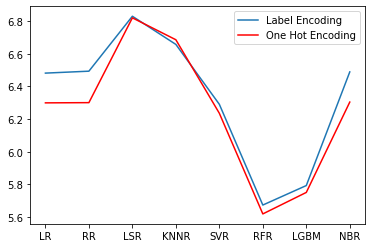

In [24]:
import matplotlib.pyplot as plt
models=["Linear Regression","Ridge Regression","Lasso Regression","KNN Regression","Support Vector Regression","Random forest regression","Light GBM","Naive Bayes"]
mod1=["LR","RR","LSR","KNNR","SVR","RFR","LGBM","NBR"]
plt.plot(mod1,msel)
plt.plot(mod1,mseh,'r')
plt.legend(["Label Encoding","One Hot Encoding"])
for i in range(8) :
  print(mod1[i],":",models[i])
plt.show()

So I have used the shuffle option on the dataset which shuffles the data everytime we run the code. So generally One Hot encoded models work better and out of them the random forest regressor gives least error but sometimes Light GBM tree trumps it.

